In [25]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [26]:
data_folders= [
    "FixedT2TDist", # Moving exciter but keeping t2t dist constant at a step
    "FixedTTEDists", # not moving anything just changing the step
]

err_correction_type="pretrained" #[no, gt, pretrained]
# freqs_to_use=[775e6, 815e6, 875e6, 915e6, 975e6]
freq_to_use=915e6

In [ ]:
lambda_ = 3e8/915e6
th_phi = 2*np.pi*(112 .2/100)/lambda_
th_phi = th_phi % (np.pi)

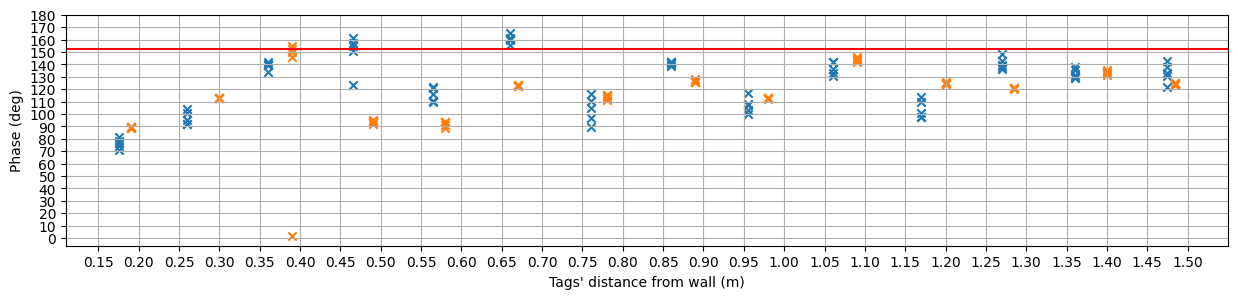

In [28]:
plt.figure(figsize=(15,3))
plt.axhline(y=np.rad2deg(th_phi), color='r', linestyle='-', label="expected phase")
x_tick_array=[]
for db in data_folders:
    with open(f"{db}/{err_correction_type}_correction_all_phases.pkl",'rb') as f:
        all_freqs=pickle.load(f)
    
    with open(f"{db}/processedDF_aggregated.pkl",'rb') as f:
        processedDF_aggregated=pickle.load(f)
    x=[]
    
    for i in processedDF_aggregated["wall dist"].unique():
        x+=[i]*5
        
    plt.scatter(x, np.rad2deg(all_freqs[915e6][1.122]), marker='x')
    # x_tick_array+=list(processedDF_aggregated["wall dist"].unique())
    x_tick_array.append(list(processedDF_aggregated["wall dist"].unique()))
    plt.yticks(np.arange(0,181,10))

    plt.xlabel("Tags' distance from wall (m)")
    plt.ylabel("Phase (deg)")

# plt.xticks(x_tick_array[0])
plt.xticks(np.arange(0.15,1.51,0.05))
plt.grid()
